### Dit is Anaconda-envs JP901-Jupyter Lab-JP901v1.ipynb VvE data
2023 VIII V1

The yearly increase rate (DY2010) from 2000 to 2010 is: 1.67261258%
      Jaar Bijdragen/J
2000  2000   79 366,00
2001  2001   80 693,49
2002  2002   82 043,18
2003  2003   83 415,44
2004  2004   84 810,66
2005  2005   86 229,21
2006  2006   87 671,49
2007  2007   89 137,90
2008  2008   90 628,83
2009  2009   92 144,70
2010  2010   93 685,92
2011  2011   95 252,92
2012  2012   96 846,13
2013  2013   98 466,00
2014  2014  100 112,95
2015  2015  101 787,45
2016  2016  103 489,96
2017  2017  105 220,95
2018  2018  106 980,89
2019  2019  108 770,26
2020  2020  110 589,57
2021  2021  112 439,30
2022  2022  114 319,98
2023  2023  116 232,11
2024  2024  118 176,22
2025  2025  120 152,85
2026  2026  122 162,54
2027  2027  124 205,85
2028  2028  126 283,33
2029  2029  128 395,56
2030  2030  130 543,12
2031  2031  132 726,60
2032  2032  134 946,60
2033  2033  137 203,74
2034  2034  139 498,62


Please set the y-axis tick interval (20000, 25000 or 500000):  20000
Please set the plot width between 1000 and 2000:  1300


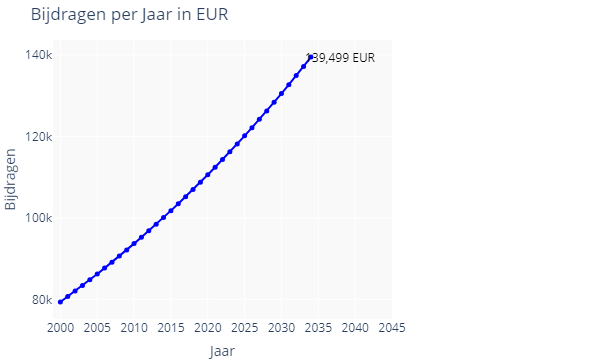

data\data901v.csv already exists. Do you want to overwrite it? (yes/no):  no


Data saved to: data\data901v003.csv


data\data901v.xlsx already exists. Do you want to overwrite it? (yes/no):  no


Data saved to: data\data901v003.xlsx


In [6]:
import os
import pandas as pd
import plotly.graph_objects as go

# create folders for images and data and requirements and setup and startup after setup
if not os.path.exists("images"):
    os.mkdir("images")
if not os.path.exists("data"):
    os.mkdir("data")
if not os.path.exists("requirements"):
    os.mkdir("requirements")
if not os.path.exists("setup_start"):
    os.mkdir("etup_start")

# rest code continue
def format_euro(amount):
    """Format number to Euro currency format."""
    return "{:,.2f}".format(amount).replace(",", " ").replace(".", ",")

def get_new_filename(base_filename):
    """Get the filename, incrementing the trailing number if it exists."""
    if not os.path.exists(base_filename):
        return base_filename

    if input(f"{base_filename} already exists. Do you want to overwrite it? (yes/no): ").lower() == 'yes':
        return base_filename

    file_parts = base_filename.split('.')
    file_name = file_parts[0]
    file_extension = file_parts[1]
    
    file_number = 1
    if file_name[-3:].isdigit():
        file_number = int(file_name[-3:])
        
    new_filename = f"{file_name[:-3] if file_name[-3:].isdigit() else file_name}{str(file_number + 1).zfill(3)}.{file_extension}"
    while os.path.exists(new_filename):
        file_number += 1
        new_filename = f"{file_name[:-3] if file_name[-3:].isdigit() else file_name}{str(file_number + 1).zfill(3)}.{file_extension}"
    
    return new_filename
# Calculate the compounding interest of 2000-2010 years' Bijdragen/J
start_value = 79366.00
end_value = 93685.92
jaren = 2010 - 2000

DY2010 = (end_value / start_value) ** (1/jaren) - 1

print(f'The yearly increase rate (DY2010) from 2000 to 2010 is: {DY2010 * 100:.8f}%')

# Define the range of years and the initial funding amount
jaren = range(2000, 2035)
start_funding = 79366.00
DY2010 = 1 + (1.67261258/100)

# Create a DataFrame upfront
df = pd.DataFrame(index=jaren, columns=["Jaar", "Bijdragen/J"])
df["Jaar"] = jaren

# Calculate the funding amount for each year
for year in df["Jaar"]:
    df.loc[year, "Bijdragen/J"] = format_euro(start_funding if year == 2000 else start_funding * DY2010)
    if year != 2000:
        start_funding *= DY2010

# Print the data for the "jaren" 2000 to 2010
print(df.loc[2000:2035])

if not os.path.exists("images"):
    os.mkdir("images")
if not os.path.exists("data"):
    os.mkdir("data")

# ... [Your previous code for dataframe creation remains unchanged]

# Extract the data for plotting
jaar = df['Jaar']
bijdragen = [float(val.replace(',', '.')) for val in df['Bijdragen/J'].str.replace(' ', '')]

# Prompt user for y-axis tick interval
while True:
    try:
        interval = int(input("Please set the y-axis tick interval (20000, 25000 or 500000): "))
        if interval in [20000, 25000, 50000]:
            break
        else:
            print("Invalid value. Choose from 25000, 50000, or 100000.")
    except ValueError:
        print("Please enter a valid number.")

# Prompt user for the plot width
while True:
    try:
        width = int(input("Please set the plot width between 1000 and 2000: "))
        if 1000 <= width <= 2000:
            break
        else:
            print("Invalid value. Please enter a value between 1000 and 2000.")
    except ValueError:
        print("Please enter a valid number.")

tickvals = list(range(0, 350001, interval))
ticktext = [f"{val//1000}k" for val in tickvals]

# Create the plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=jaar, y=bijdragen,
                         mode='lines+markers',
                         name='Bijdragen/J',
                         marker=dict(color='blue', size=5),
                         line=dict(color='blue', width=2),
                         hovertemplate='%{y:,.0f} EUR<extra></extra>'
                        ))

# Add title and adjust the axes
fig.update_layout(
    title="Bijdragen per Jaar in EUR",
    xaxis_title="Jaar",
    xaxis=dict(tickvals=list(range(2000, 2046, 5)), range=[1999, 2045]),  # Steps of 5 for years
    yaxis_title="Bijdragen",
    yaxis_tickvals=tickvals,
    yaxis_ticktext=ticktext,
    plot_bgcolor='#F9F9F9',
    width=width,
    margin=dict(l=10, r=220, b=0, t=40)  # Adjusted the margins
)

# Add the annotation for the last data point
fig.add_annotation(
    x=2038,  # Shift the annotation to the right to avoid overlap
    y=bijdragen[-1],
    xref="x", 
    yref="y",
    text=f"{bijdragen[-1]:,.0f} EUR",
    showarrow=False,
    font=dict(
        color="#000000",
        size=12
    ),
    bgcolor="rgba(0,0,0,0)"  # Transparent background
)

# Enable vertical crosshair lines on hover
fig.update_layout(hovermode="x")

fig.show()

# save data to file 
def save_data_to_file(data, directory, base_filename, extension):
    """Saves the data to a file and returns the filename."""
    # Create the filename using the base_filename and extension
    filename = os.path.join(directory, base_filename + extension)

    # Check if the file exists, and if so, get a new filename
    filename = get_new_filename(filename)

    # Save the data to the file based on the extension
    if extension == '.csv':
        data.to_csv(filename, index=False)
    elif extension == '.xlsx':
        data.to_excel(filename, index=False)
    else:
        raise ValueError(f"Unsupported file extension: {extension}")

    return filename


# Save the plot in multiple formats
fig.write_image("images/fig1.png")
fig.write_image("images/fig1.jpeg")
fig.write_image("images/fig1.svg")
fig.write_image("images/fig1.pdf")


# save data to dataf iles

csv_filename = save_data_to_file(df, "data", "data901v", '.csv')
print(f"Data saved to: {csv_filename}")

xlsx_filename = save_data_to_file(df, "data", "data901v", '.xlsx')
print(f"Data saved to: {xlsx_filename}")

